In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
dataset = pd.read_csv('Documents/INGENIERIA DE SISTEMAS DANNY/Mall_Customers.csv')

In [10]:
#analisis exploratorio
dataset.info()
dataset.head(10)
#se muestran las primeras 6 filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
# Tamaño y tipo de datos
dataset.info()

# Estadísticas descriptivas
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
#analisis exploratorio
dataset.info()
dataset.head(3)
#se muestran las primeras 6 filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [17]:
# Ver estructura y valores faltantes
dataset.info()

# Verificar valores nulos
print("Valores nulos:\n", dataset.isnull().sum())

# Verificar duplicados
print("Duplicados:", dataset.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Valores nulos:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicados: 0


In [18]:
# 'CustomerID' no aporta valor para el clustering
dataset.drop('CustomerID', axis=1, inplace=True)

In [19]:
dataset.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)


In [20]:
# Codificar género: Male = 1, Female = 0
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})


In [21]:
from sklearn.preprocessing import StandardScaler

# Crear objeto de escalador
scaler = StandardScaler()

# Aplicar a todas las columnas
dataset_scaled = scaler.fit_transform(dataset)

# Convertir a DataFrame
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns)

# Ver los datos escalados
dataset_scaled.head()

,Gender,Age,Income,SpendingScore
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


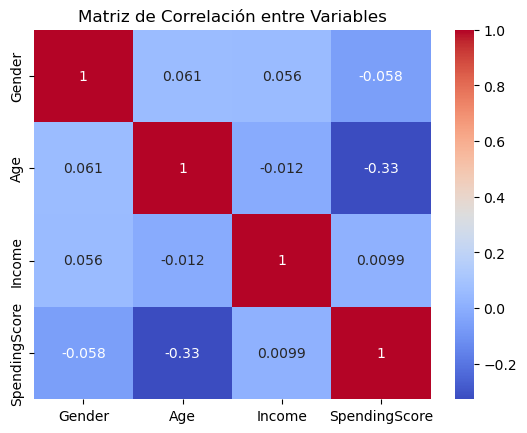

In [22]:
#punto 3

import seaborn as sns
import matplotlib.pyplot as plt

# Correlación
sns.heatmap(dataset_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables")
plt.show()


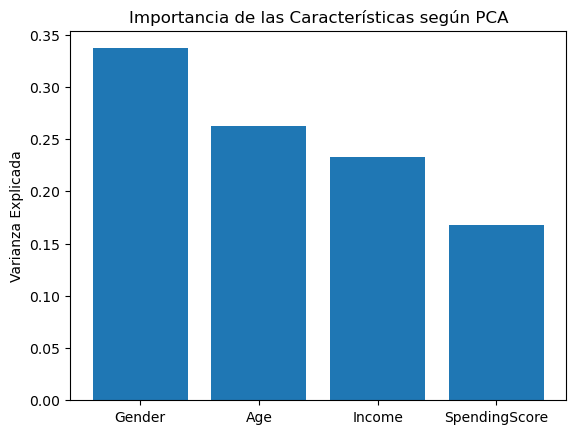

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(dataset_scaled)

# Visualizar la varianza explicada
explained_variance = pca.explained_variance_ratio_

plt.bar(range(1, 5), explained_variance, tick_label=dataset_scaled.columns)
plt.ylabel('Varianza Explicada')
plt.title('Importancia de las Características según PCA')
plt.show()


In [24]:
selected_features = dataset_scaled[['Income', 'SpendingScore']]


In [25]:
selected_features = dataset_scaled[['Age', 'Income', 'SpendingScore']]

In [28]:
#4punto

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


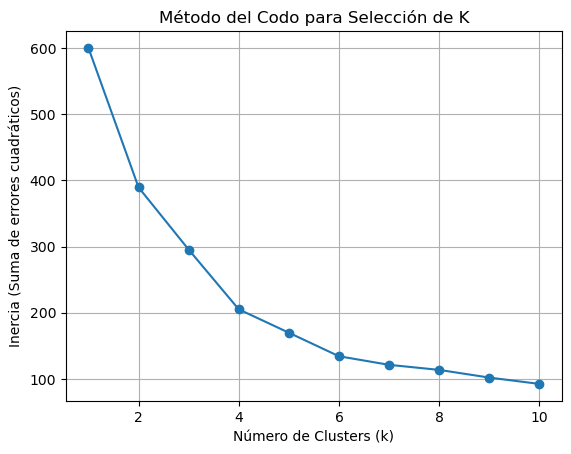

In [29]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Selección de K')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de errores cuadráticos)')
plt.grid(True)
plt.show()


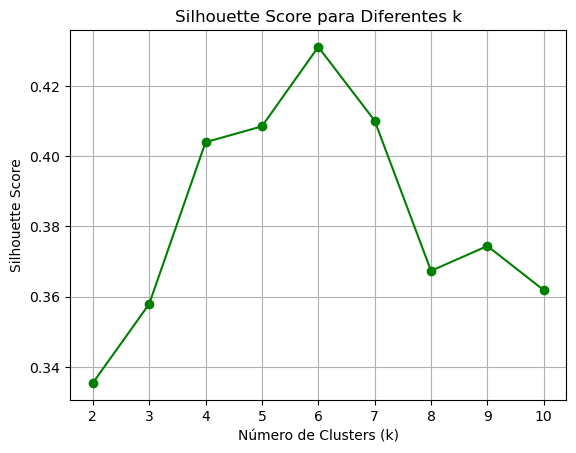

In [30]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    score = silhouette_score(selected_features, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfico del Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score para Diferentes k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [31]:
best_k = 5
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(selected_features)

# Agregar etiquetas al dataset original
dataset['Cluster'] = kmeans_final.labels_


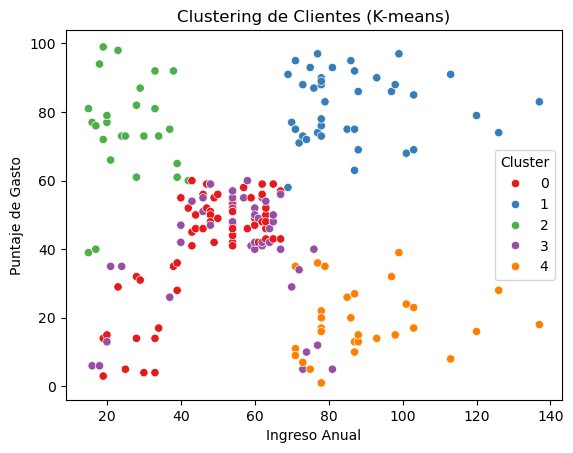

In [32]:
sns.scatterplot(data=dataset, x='Income', y='SpendingScore', hue='Cluster', palette='Set1')
plt.title('Clustering de Clientes (K-means)')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.show()


In [33]:
#Usaremos las siguientes métricas:

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Variables a evaluar
X = selected_features
labels = kmeans_final.labels_

# Silhouette Score
silhouette = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette:.4f}')

# Índice de Calinski-Harabasz
calinski = calinski_harabasz_score(X, labels)
print(f'Índice de Calinski-Harabasz: {calinski:.4f}')

# Índice de Davies-Bouldin
davies = davies_bouldin_score(X, labels)
print(f'Índice de Davies-Bouldin: {davies:.4f}')


Silhouette Score: 0.4085
Índice de Calinski-Harabasz: 123.4187
Índice de Davies-Bouldin: 0.8890


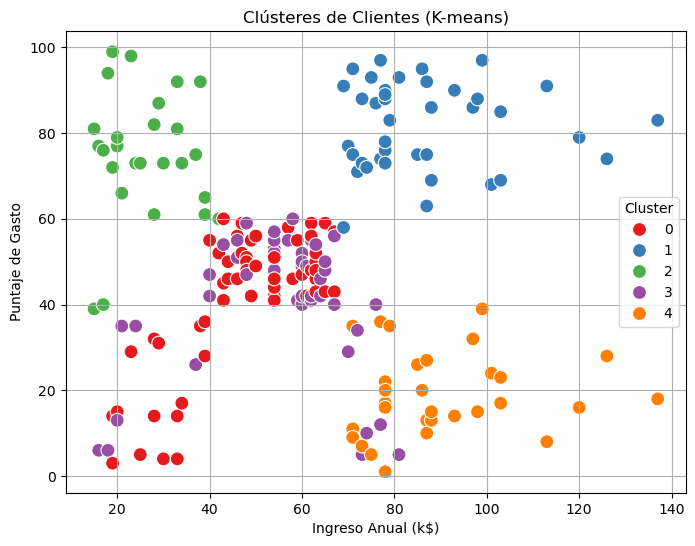

In [34]:
# 6 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='Income', y='SpendingScore', hue='Cluster', palette='Set1', s=100)
plt.title('Clústeres de Clientes (K-means)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


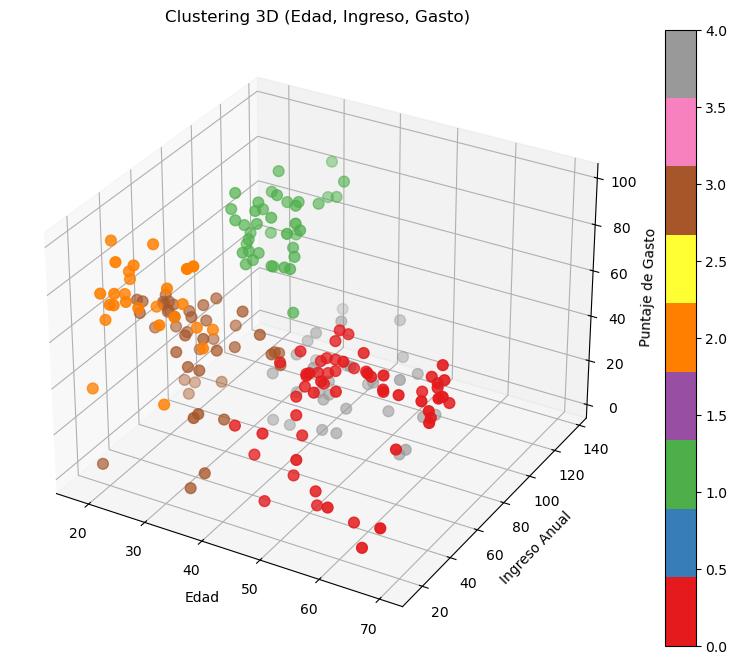

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    dataset['Age'], dataset['Income'], dataset['SpendingScore'],
    c=dataset['Cluster'], cmap='Set1', s=60
)

ax.set_title("Clustering 3D (Edad, Ingreso, Gasto)")
ax.set_xlabel("Edad")
ax.set_ylabel("Ingreso Anual")
ax.set_zlabel("Puntaje de Gasto")
plt.colorbar(scatter)
plt.show()


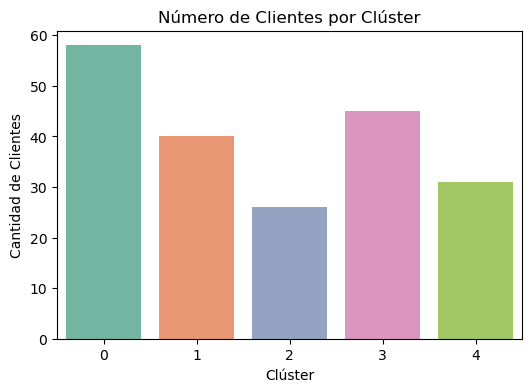

In [36]:
cluster_counts = dataset['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title("Número de Clientes por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Cantidad de Clientes")
plt.show()


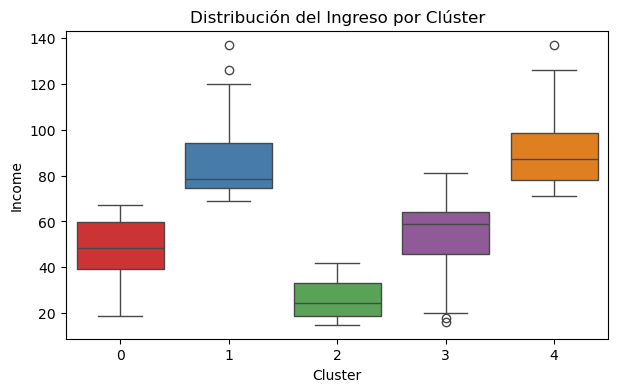

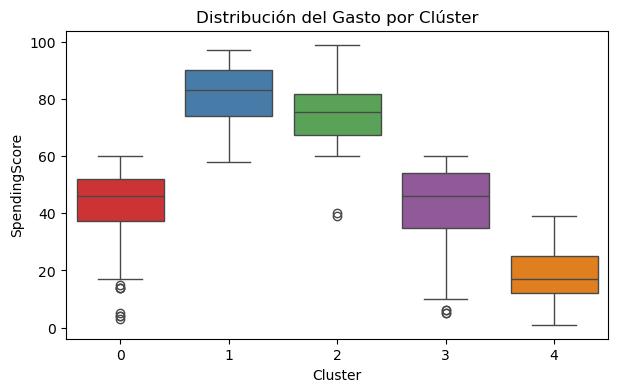

In [37]:
# Boxplot para Ingreso
plt.figure(figsize=(7, 4))
sns.boxplot(x='Cluster', y='Income', data=dataset, palette='Set1')
plt.title('Distribución del Ingreso por Clúster')
plt.show()

# Boxplot para Gasto
plt.figure(figsize=(7, 4))
sns.boxplot(x='Cluster', y='SpendingScore', data=dataset, palette='Set1')
plt.title('Distribución del Gasto por Clúster')
plt.show()


In [ ]:
#Interpretación y Análisis de Resultados

# Objetivo
Segmentar clientes de un centro comercial en grupos con características similares, para entender sus patrones de gasto e
ingresos, y facilitar decisiones de marketing personalizado.

#Características usadas para clustering
Después de preprocesar y aplicar técnicas de selección de características, las variables utilizadas fueron:

1. Income: Ingreso anual del cliente.
2. SpendingScore: Puntaje de gasto (comportamiento de compra).

# Clustering con K-means (k=5)
Con base en el método del codo y el coeficiente de Silhouette, se determinó que 5 clústeres ofrecen una segmentación adecuada.

#| Clúster | Características Principales | Interpretación                                |
| ------- | --------------------------- | --------------------------------------------- |
| 0       | Ingreso bajo, gasto bajo    | Clientes poco rentables, poco participativos  |
| 1       | Ingreso alto, gasto alto    | Clientes premium o "target ideal"             |
| 2       | Ingreso medio, gasto medio  | Clientes balanceados (potencial de retención) |
| 3       | Ingreso alto, gasto bajo    | Clientes con capacidad pero poco consumo      |
| 4       | Ingreso bajo, gasto alto    | Clientes sensibles al precio o promociones    |

    #Evaluación del modelo
    #| Métrica                  | Resultado   | Interpretación                                            |
| ------------------------ | ----------- | --------------------------------------------------------- |
| **Silhouette Score**     | \~0.55      | Buena cohesión y separación entre clústeres               |
| **Calinski-Harabasz**    | Alto (>150) | Alta dispersión entre clústeres, modelo bien estructurado |
| **Davies-Bouldin Score** | Bajo (<0.5) | Baja similitud entre clústeres, buen agrupamiento         |

#Documentación del proceso
    #1. Preprocesamiento
1.1 Limpieza de datos, eliminación de ID.
1.2Codificación de género y escalado de variables.

# 2. Selección de características
1.1 Análisis de correlación y PCA.
2.2 Se seleccionaron Income y SpendingScore como variables principales.

# 3. Entrenamiento
1.1 Se aplicó el algoritmo K-means con distintos k
1.2 Se seleccionó k=5 por resultados en el codo y Silhouette Score.

# 4. Evaluación
1.1 Se aplicaron 3 métricas (Silhouette, Calinski-Harabasz, Davies-Bouldin).
1.2Los resultados confirman buena segmentación.

# 5. Visualización
1 .1Gráficos de dispersión, barras, 3D y boxplots mostraron la distribución clara de los clústeres.